In [1]:
import warnings
warnings.simplefilter('ignore')

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [3]:
TRAIN_FILE_PATH = './course_project_train.csv'
PREPARED_DATASET_PATH = './course_propject_prep.csv'

In [4]:
df = pd.read_csv(TRAIN_FILE_PATH)

In [5]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

In [7]:
df.shape

(7500, 17)

In [8]:
def get_object_column_names():
    result = []
    object_columns = df.select_dtypes(include="object")
    for column in object_columns:
        result.append(column)
    return result

In [9]:
obj_columns = get_object_column_names()
print(obj_columns)

['Home Ownership', 'Years in current job', 'Purpose', 'Term']


In [10]:
def show_column_values(column_name: str):
    print('\r\n')
    print(20 * '-')
    print(f'{column_name}\r\n')
    print(df[column_name].value_counts())
    print(f'Has NaN values: {len(df[df[column_name].isnull()]) > 0}')

In [11]:
for column_name in obj_columns:
    show_column_values(column_name)



--------------------
Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
Has NaN values: False


--------------------
Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
Has NaN values: True


--------------------
Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64
Has NaN values: 

In [12]:
home_ownership = {
    'Home Mortgage': 0,
    'Rent': 1,
    'Own Home': 2,
    'Have Mortgage': 3
}

years_incurrent_job = {
    '10+ years': 10,
    '2 years': 2,
    '3 years': 3,
    '< 1 year': 0,
    '5 years': 3,
    '1 year': 1,
    '4 years': 4,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9
}

purpose_dict = {
    'debt consolidation': 0,
    'other': 1,
    'home improvements': 2,
    'business loan': 3,
    'buy a car': 4,
    'medical bills': 5,
    'major purchase': 6,
    'take a trip': 7,
    'buy house': 8,
    'small business': 9,
    'wedding': 10,
    'moving': 11,
    'educational expenses': 12,
    'vacation': 13,
    'renewable energy': 14
}

term = {
    'Short Term': 0,
    'Long Term': 1
}

In [13]:
print(type(home_ownership))
print(type(years_incurrent_job))
print(type(purpose_dict))
print(type(term))

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


In [14]:
def get_contains_null_values_columns():
    result = []
    for column in df.columns:
        if len(df[column].isnull()) > 0:
            result.append(column)
    return result

In [15]:
print(get_contains_null_values_columns())

['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score', 'Credit Default']


In [16]:
def clean_nan_values(column_name: str):
    df.loc[df[column_name].isnull(), column_name] = df[column_name].mode()[0]
    df.loc[df[column_name] == 'nan', column_name] = df[column_name].mode()[0]

In [17]:
for column in get_contains_null_values_columns():
    clean_nan_values(column)

In [18]:
df['ID'] = df.index.tolist()

In [19]:
home_ownership_func = lambda x: home_ownership[x]
years_incurrent_job_func = lambda x: years_incurrent_job[x]
purpose_func = lambda x: purpose_dict[x]
term_func = lambda x:  term[x]

In [20]:
df['home_ownership'] = df['Home Ownership'].map(home_ownership_func)
df['years_incurrent_job'] = df['Years in current job'].map(years_incurrent_job_func)
df['purpose_int'] = df['Purpose'].map(purpose_func)
df['term'] = df['Term'].map(term_func)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 22 columns):
Home Ownership                  7500 non-null object
Annual Income                   7500 non-null float64
Years in current job            7500 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    7500 non-null float64
Bankruptcies                    7500 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    7500 non-null float64
Credit Default                  7

In [22]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,ID,home_ownership,years_incurrent_job,purpose_int,term
0,Own Home,482087.0,10+ years,0.0,11.0,26.3,685960.0,1.0,14.0,1.0,...,99999999.0,47386.0,7914.0,749.0,0,0,2,10,0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,14.0,0.0,...,264968.0,394972.0,18373.0,737.0,1,1,2,10,0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,14.0,0.0,...,99999999.0,308389.0,13651.0,742.0,0,2,0,8,0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,14.0,1.0,...,121396.0,95855.0,11338.0,694.0,0,3,2,6,0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,14.0,0.0,...,125840.0,93309.0,7180.0,719.0,0,4,1,8,0,0


In [51]:
FEATURE_COLIMNS = list(set(df.columns) - set(obj_columns) - set(['ID']))
print(FEATURE_COLIMNS)

['Months since last delinquent', 'Annual Income', 'Maximum Open Credit', 'Current Loan Amount', 'Tax Liens', 'Credit Default', 'Current Credit Balance', 'Monthly Debt', 'Bankruptcies', 'purpose_int', 'Number of Credit Problems', 'term', 'Years of Credit History', 'Credit Score', 'Number of Open Accounts', 'home_ownership', 'years_incurrent_job']


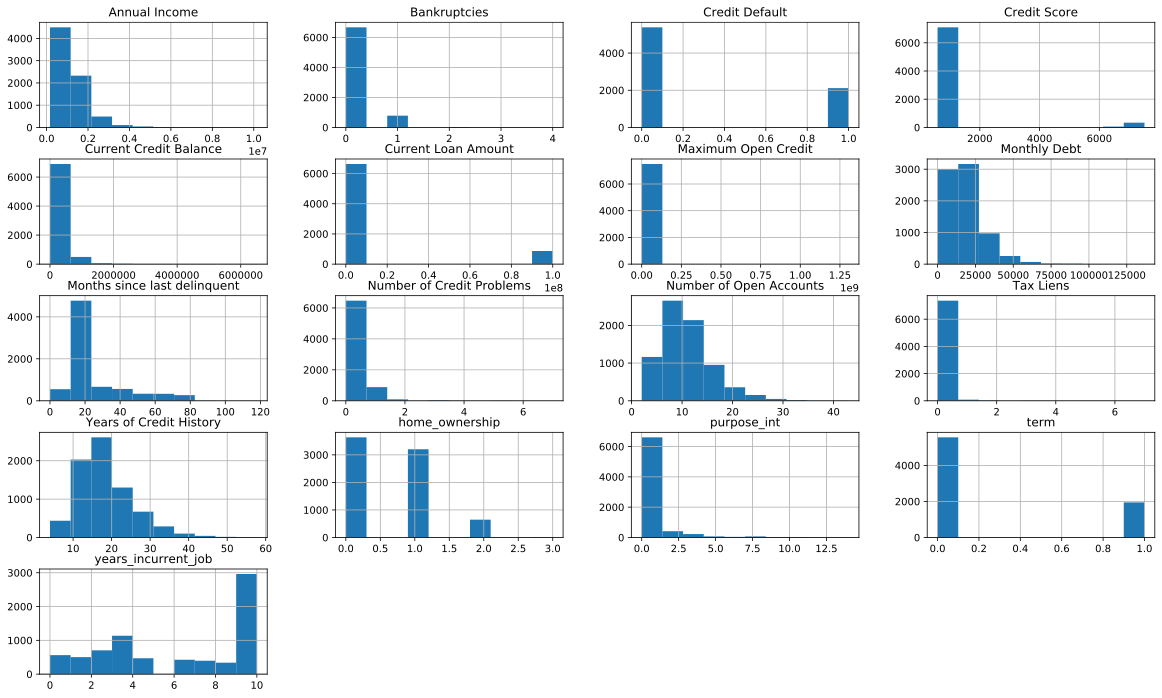

In [52]:
df[FEATURE_COLIMNS].hist(figsize=(20,12));

In [53]:
corr_matrix = df[FEATURE_COLIMNS].corr()

In [54]:
print(corr_matrix)

                              Months since last delinquent  Annual Income  \
Months since last delinquent                      1.000000      -0.014019   
Annual Income                                    -0.014019       1.000000   
Maximum Open Credit                              -0.008167       0.017169   
Current Loan Amount                              -0.012095       0.069647   
Tax Liens                                         0.068689       0.055885   
Credit Default                                    0.008210      -0.100547   
Current Credit Balance                           -0.067781       0.341208   
Monthly Debt                                     -0.014724       0.506090   
Bankruptcies                                      0.087592      -0.057448   
purpose_int                                       0.000738       0.033304   
Number of Credit Problems                         0.118338      -0.013720   
term                                              0.010147       0.090688   

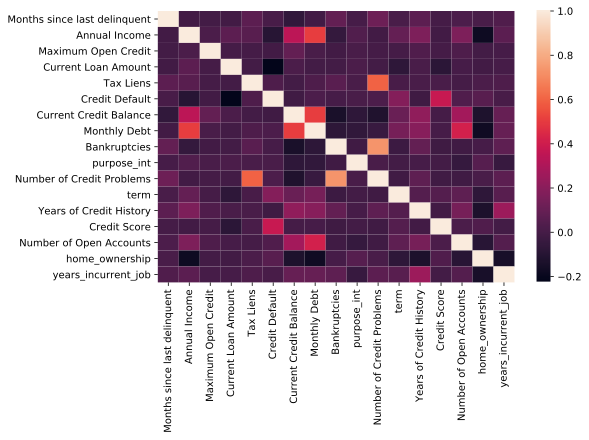

In [55]:
sns.heatmap(corr_matrix);